# Task A

# Word find and replace

In [15]:
import csv

filename = 'edmunds_extraction.csv'
models_filename = 'models.csv'
output_filename = 'edmunds_new.csv'

# Read and store the content of models.csv
models = {}
with open(models_filename, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        models[row[1].lower()] = row[0].lower()

output_list = []

# Process edmunds_extraction.csv
with open(filename, 'r') as csvFile:
    reader = csv.reader(csvFile, delimiter=',')
    for row in reader:
        for model, replacement in models.items():
            row[2] = row[2].lower().replace(model, " " + replacement + " ")
        output_list.append(row)

# Write to the output file
with open(output_filename, 'w', newline='') as outputFile:  # Set newline to ''
    writer = csv.writer(outputFile, quoting=csv.QUOTE_ALL)
    writer.writerows(output_list)

print("Wrote to edmunds_new.csv")

Wrote to edmunds_new.csv


# Word Frequency

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csg20\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
import csv
from nltk.corpus import stopwords
import re
import string
from collections import defaultdict

stop = stopwords.words('english')

inter1 = []
sentences_all = []
sentences_clean = []
sentences_unpun = []

dictionary1 = {}
d2_dict = defaultdict(dict)

with open('edmunds_new.csv') as f:
    rows = csv.reader(f, delimiter = str(','))
    for row in rows:
        inter1.append(row[2])

# Split the row into different sentences
for row in inter1:
    sentences = re.split(r' *[\.\?!][\'"\)\]]* *', row)
    for s in sentences:
        in1 = ''.join(s)
        out = re.sub('[%s]' % re.escape(string.punctuation), '', in1.lower())
        sentences_all.append(out)

# Remove stop words from sentence
for sentence in sentences_all:
    s = []
    for i in sentence.split():
        if i not in stop and i.isdigit() is False:
            s.append(i)
    sentences_clean.append(s)

# Add each words as key into a dictionary
for sentence in sentences_clean:
    #print sentence
    for word in sentence:
        dictionary1[word] = 0

# Update the frequency dictionary table
for sentence in sentences_clean:
    for word in sentence:
        dictionary1[word] = dictionary1[word] + 1

# Add each pair of words as key into a dictionary 2
for sentence in sentences_clean:
    for word in sentence:
        for word2 in sentence:
            if(word != word2):
                d2_dict[word][word2] = 0
# Update the frequency dictionary table
for sentence in sentences_clean:
    for word in sentence:
        for word2 in sentence:
            if(word != word2):
                d2_dict[word][word2] = d2_dict[word][word2] + 1

# Write word frequencies to 'word_freq.csv'
with open('word_freq.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for key, value in dictionary1.items():
        writer.writerow([key, value])

# Write word pair frequencies to 'word_pair_freq.csv'
with open('word_pair_freq.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for key1, value1 in d2_dict.items():
        for key2, value2 in d2_dict[key1].items():
            writer.writerow([key1, key2, value2])

print ("Wrote to word_freq.csv")

Wrote to word_freq.csv


# top car and attributes 

In [29]:
import csv
import operator

# Read word frequencies from 'word_freq.csv'
word_freq = {}
with open('word_freq.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        word_freq[row[0]] = int(row[1])  # Convert frequency to integer

# Sort by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_word_freq)

[('car', 7697), ('acura', 5821), ('bmw', 5526), ('toyota', 3351), ('like', 2658), ('one', 2404), ('would', 2254), ('audi', 2054), ('get', 2048), ('cadillac', 2038), ('dont', 1939), ('think', 1563), ('new', 1477), ('well', 1451), ('lexus', 1412), ('honda', 1377), ('better', 1361), ('even', 1359), ('sedan', 1331), ('im', 1319), ('much', 1316), ('drive', 1267), ('pontiac', 1262), ('good', 1197), ('infiniti', 1183), ('luxury', 1152), ('performance', 1141), ('also', 1103), ('people', 1093), ('price', 1068), ('know', 1045), ('really', 1039), ('series', 1022), ('want', 1015), ('driving', 1003), ('years', 999), ('thats', 988), ('time', 969), ('back', 943), ('make', 882), ('see', 876), ('way', 875), ('seat', 863), ('still', 862), ('best', 839), ('could', 832), ('e', 831), ('buy', 817), ('interior', 801), ('say', 796), ('manual', 792), ('ive', 776), ('go', 736), ('many', 734), ('engine', 734), ('sport', 726), ('great', 706), ('going', 691), ('year', 689), ('volvo', 676), ('less', 675), ('never',

top 10 car - ['acura', 'bmw', 'toyota', 'audi', 'cadillac', 'lexus', 'honda', 'pontiac', 'infiniti', 'volvo']

# Lift Calculation

In [ ]:
from nltk.corpus import stopwords
import re
import string
from sys import exit
import decimal
import csv
#import sys
from collections import defaultdict
import pandas as pd
itr = 0
stop = stopwords.words('english')
df1 = pd.DataFrame(columns=['nb','nb2','value'])
inter1 = []
posts_all = []
posts_clean = []
keys_all = [] 
file_length = 0 
results_dict = {'Pair':'Lift Value'};
writer_output = csv.writer(open('Lift_Values.csv', 'w'), delimiter=str(','), lineterminator='\n')

dictionary1 = {}
d2_dict = defaultdict(dict)

with open('edmunds_new.csv') as f:
    rows = csv.reader(f, delimiter = str(','))
    #file_length = '[%s]' % len(f.readlines())
    for row in rows:
        inter1.append(row[2])
        file_length = file_length + 1


for row in inter1:
    out1 = re.sub('[%s]' % re.escape(string.punctuation), '', row.lower())
    posts_all.append(out1)

for post in posts_all:
    s = []
    for i in post.split():
        if i not in stop:
            s.append(i)
    posts_clean.append(s)


#EVERYTHING NEEDS TO BE IN LOWER CASE in edmunds_pair_keys.txt file

with open('edmunds_pair_keys.txt') as fileText:
    for row in fileText:
        keys_all = row.split(",")

    length = len(keys_all)
    for index in range(len(keys_all)):

        subs_counter = index + 1
        while subs_counter < len(keys_all):

            nb = keys_all[index]
            nb2 = keys_all[subs_counter]
            print ('-------------------' + nb + ' and ' + nb2 + '-------------------')
            subs_counter = subs_counter + 1

            nb_plu = nb + 's'
            nb_app = nb + "'s"

            nb2_plu = nb2 + 's'
            nb2_app = nb2 + "'s"

            for post in posts_clean:
                for n,word in enumerate(post):
                    if(word == nb_plu or word == nb_app):
                        post[n] = nb
                    elif(word == nb2_plu or word == nb2_app):
                        post[n] = nb2

            for post in posts_clean:
                for word in post:
                    dictionary1[word] = 0

            for post in posts_clean:
                x = {}
                for word in post:
                    x[word] = 1
                for word in post:
                    if (x[word] > 0):
                        dictionary1[word] = dictionary1[word] + 1
                    x[word] = -1

            writer = csv.writer(open('word_post.csv', 'w'))
            for key, value in dictionary1.items():
                writer.writerow([key, value])

            for post in posts_clean:
                for word in post:
                    for word2 in post:
                        if(word != word2):
                            d2_dict[word][word2] = 0

            for post in posts_clean:
                d3_dict = defaultdict(dict)
                for word in post:
                    for word2 in post:
                        if(word != word2):
                            d3_dict[word][word2] = 1

                for word in post:
                    for word2 in post:
                        if(word != word2):
                            if (d3_dict[word][word2] > 0):
                                d2_dict[word][word2] = d2_dict[word][word2] + 1
                            d3_dict[word][word2] = -1


            if(nb in dictionary1):
                print (nb + " " + str(dictionary1[nb]))
            else:
                print ("This word is not present")
                exit()

            if(nb2 in dictionary1):
                print (nb2 + " " + str(dictionary1[nb2]))
            else:
                print ("This word is not present")
                exit()

            if(nb in d2_dict):
                if(nb2 in d2_dict[nb]):
                    print (nb +" " +nb2 +" " + str(d2_dict[nb][nb2]))
                    results_dict.update({nb + "_" +nb2:decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal((dictionary1[nb]*dictionary1[nb2])))})
                    print ('lift('+ nb + "," +nb2 + ')',decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal((dictionary1[nb]*dictionary1[nb2]))))
                    val = decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal((dictionary1[nb]*dictionary1[nb2])))
                    df1.loc[itr] = [nb, nb2, val]  # adding a row
                    itr = itr + 1
                    writer_output = csv.writer(open('Lift_Values.csv', 'w'))
                    for key, value in results_dict.items():
                        writer_output.writerow([nb + "_" +nb2, decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal(dictionary1[nb]*dictionary1[nb2]))])
                else:
                    print ("These words are not present together in a post")
                    exit()
            else:
                print ("These words are not present together in a post")
                exit()
print ('--------------------------------------------------------')
df1.to_csv('Lift_Values_attri.csv')

make it matrix

In [40]:
lift_data = pd.read_csv('Lift_Values_attri.csv')

items = pd.unique(lift_data[['nb', 'nb2']].values.ravel('K'))

full_matrix = pd.DataFrame(index=items, columns=items)

for index, row in lift_data.iterrows():
    full_matrix.at[row['nb'], row['nb2']] = row['value']
    full_matrix.at[row['nb2'], row['nb']] = row['value']  

np.fill_diagonal(full_matrix.values, 1)

full_matrix = full_matrix.fillna(0)

full_matrix.to_csv('Lift_Matrix.csv')

# MDS

c:\Users\csg20\anaconda3\envs\MMA\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


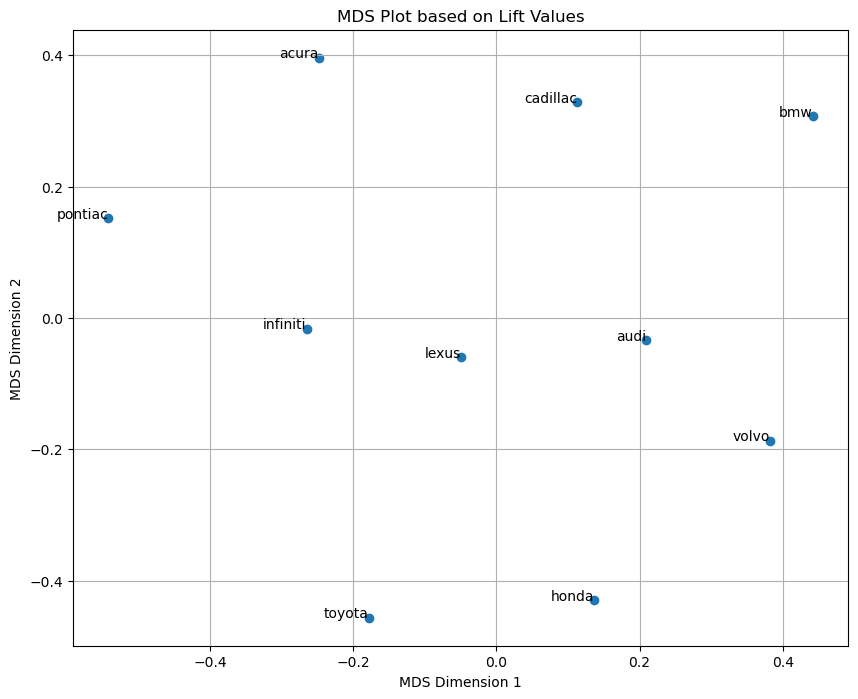

In [41]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

full_matrix = pd.read_csv('Lift_Matrix_Car.csv', index_col=0)
dissimilarity_matrix = 1 / full_matrix.replace(0, 1e-9).astype(float)

# Apply MDS to reduce dimensionality to 2D
# Note that this could take some time depending on the size of the matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(dissimilarity_matrix)

# Plot the MDS result
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1])

# Annotate points with feature names (the names of the brands in this case)
feature_names = dissimilarity_matrix.index
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (mds_result[i, 0], mds_result[i, 1]), ha='right')

plt.title('MDS Plot based on Lift Values')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

# Task C

In [ ]:
### replace the attributes

filename = 'edmunds_new.csv'
models_filename = 'attributes.csv'
output_filename = 'edmunds_final.csv'

models = {}
with open(models_filename, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        models[row[1].lower()] = row[0].lower()

output_list = []

with open(filename, 'r') as csvFile:
    reader = csv.reader(csvFile, delimiter=',')
    for row in reader:
        for model, replacement in models.items():
            row[2] = row[2].lower().replace(model, " " + replacement + " ")
        output_list.append(row)

# Write to the output file
with open(output_filename, 'w', newline='') as outputFile: 
    writer = csv.writer(outputFile, quoting=csv.QUOTE_ALL)
    writer.writerows(output_list)

print("Wrote to edmunds_final.csv")

In [ ]:
### get the final word frequency

stop = stopwords.words('english')

inter1 = []
sentences_all = []
sentences_clean = []
sentences_unpun = []

dictionary1 = {}
d2_dict = defaultdict(dict)

with open('edmunds_final.csv') as f:
    rows = csv.reader(f, delimiter = str(','))
    for row in rows:
        inter1.append(row[2])

# Split the row into different sentences
for row in inter1:
    sentences = re.split(r' *[\.\?!][\'"\)\]]* *', row)
    for s in sentences:
        in1 = ''.join(s)
        out = re.sub('[%s]' % re.escape(string.punctuation), '', in1.lower())
        sentences_all.append(out)

# Remove stop words from sentence
for sentence in sentences_all:
    s = []
    for i in sentence.split():
        if i not in stop and i.isdigit() is False:
            s.append(i)
    sentences_clean.append(s)

# Add each words as key into a dictionary
for sentence in sentences_clean:
    #print sentence
    for word in sentence:
        dictionary1[word] = 0

# Update the frequency dictionary table
for sentence in sentences_clean:
    for word in sentence:
        dictionary1[word] = dictionary1[word] + 1

# Add each pair of words as key into a dictionary 2
for sentence in sentences_clean:
    for word in sentence:
        for word2 in sentence:
            if(word != word2):
                d2_dict[word][word2] = 0
# Update the frequency dictionary table
for sentence in sentences_clean:
    for word in sentence:
        for word2 in sentence:
            if(word != word2):
                d2_dict[word][word2] = d2_dict[word][word2] + 1

# Write word frequencies to 'word_freq.csv'
with open('word_freq.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for key, value in dictionary1.items():
        writer.writerow([key, value])

# Write word pair frequencies to 'word_pair_freq.csv'
with open('word_pair_freq.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for key1, value1 in d2_dict.items():
        for key2, value2 in d2_dict[key1].items():
            writer.writerow([key1, key2, value2])

print ("Wrote to word_freq and word_pair_freq.csv")

top 5 attribute - ['Preformance', 'Design', 'Comfort', 'Technology', 'Safety']

In [ ]:
itr = 0
stop = stopwords.words('english')
df1 = pd.DataFrame(columns=['nb','nb2','value'])
inter1 = []
posts_all = []
posts_clean = []
keys_all = [] 
file_length = 0 
results_dict = {'Pair':'Lift Value'};
writer_output = csv.writer(open('Lift_Values.csv', 'w'), delimiter=str(','), lineterminator='\n')

dictionary1 = {}
d2_dict = defaultdict(dict)

with open('edmunds_new.csv') as f:
    rows = csv.reader(f, delimiter = str(','))
    #file_length = '[%s]' % len(f.readlines())
    for row in rows:
        inter1.append(row[2])
        file_length = file_length + 1


for row in inter1:
    out1 = re.sub('[%s]' % re.escape(string.punctuation), '', row.lower())
    posts_all.append(out1)

for post in posts_all:
    s = []
    for i in post.split():
        if i not in stop:
            s.append(i)
    posts_clean.append(s)


#EVERYTHING NEEDS TO BE IN LOWER CASE in edmunds_pair_keys.txt file

with open('edmunds_pair_keys.txt') as fileText:
    for row in fileText:
        keys_all = row.split(",")

    length = len(keys_all)
    for index in range(len(keys_all)):

        subs_counter = index + 1
        while subs_counter < len(keys_all):

            nb = keys_all[index]
            nb2 = keys_all[subs_counter]
            print ('-------------------' + nb + ' and ' + nb2 + '-------------------')
            subs_counter = subs_counter + 1

            nb_plu = nb + 's'
            nb_app = nb + "'s"

            nb2_plu = nb2 + 's'
            nb2_app = nb2 + "'s"

            for post in posts_clean:
                for n,word in enumerate(post):
                    if(word == nb_plu or word == nb_app):
                        post[n] = nb
                    elif(word == nb2_plu or word == nb2_app):
                        post[n] = nb2

            for post in posts_clean:
                for word in post:
                    dictionary1[word] = 0

            for post in posts_clean:
                x = {}
                for word in post:
                    x[word] = 1
                for word in post:
                    if (x[word] > 0):
                        dictionary1[word] = dictionary1[word] + 1
                    x[word] = -1

            writer = csv.writer(open('word_post.csv', 'w'))
            for key, value in dictionary1.items():
                writer.writerow([key, value])

            for post in posts_clean:
                for word in post:
                    for word2 in post:
                        if(word != word2):
                            d2_dict[word][word2] = 0

            for post in posts_clean:
                d3_dict = defaultdict(dict)
                for word in post:
                    for word2 in post:
                        if(word != word2):
                            d3_dict[word][word2] = 1

                for word in post:
                    for word2 in post:
                        if(word != word2):
                            if (d3_dict[word][word2] > 0):
                                d2_dict[word][word2] = d2_dict[word][word2] + 1
                            d3_dict[word][word2] = -1


            if(nb in dictionary1):
                print (nb + " " + str(dictionary1[nb]))
            else:
                print ("This word is not present")
                exit()

            if(nb2 in dictionary1):
                print (nb2 + " " + str(dictionary1[nb2]))
            else:
                print ("This word is not present")
                exit()

            if(nb in d2_dict):
                if(nb2 in d2_dict[nb]):
                    print (nb +" " +nb2 +" " + str(d2_dict[nb][nb2]))
                    results_dict.update({nb + "_" +nb2:decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal((dictionary1[nb]*dictionary1[nb2])))})
                    print ('lift('+ nb + "," +nb2 + ')',decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal((dictionary1[nb]*dictionary1[nb2]))))
                    val = decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal((dictionary1[nb]*dictionary1[nb2])))
                    df1.loc[itr] = [nb, nb2, val]  # adding a row
                    itr = itr + 1
                    writer_output = csv.writer(open('Lift_Values.csv', 'w'))
                    for key, value in results_dict.items():
                        writer_output.writerow([nb + "_" +nb2, decimal.Decimal(decimal.Decimal(file_length*(d2_dict[nb][nb2]))/decimal.Decimal(dictionary1[nb]*dictionary1[nb2]))])
                else:
                    print ("These words are not present together in a post")
                    exit()
            else:
                print ("These words are not present together in a post")
                exit()
print ('--------------------------------------------------------')
df1.to_csv('Lift_Values_attri_final.csv')

In [ ]:
lift_data = pd.read_csv('Lift_Values_attri_final.csv')

items = pd.unique(lift_data[['nb', 'nb2']].values.ravel('K'))

full_matrix = pd.DataFrame(index=items, columns=items)

for index, row in lift_data.iterrows():
    full_matrix.at[row['nb'], row['nb2']] = row['value']
    full_matrix.at[row['nb2'], row['nb']] = row['value']  

np.fill_diagonal(full_matrix.values, 1)

full_matrix = full_matrix.fillna(0)

full_matrix.to_csv('Lift_Matrix.csv')

c:\Users\csg20\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


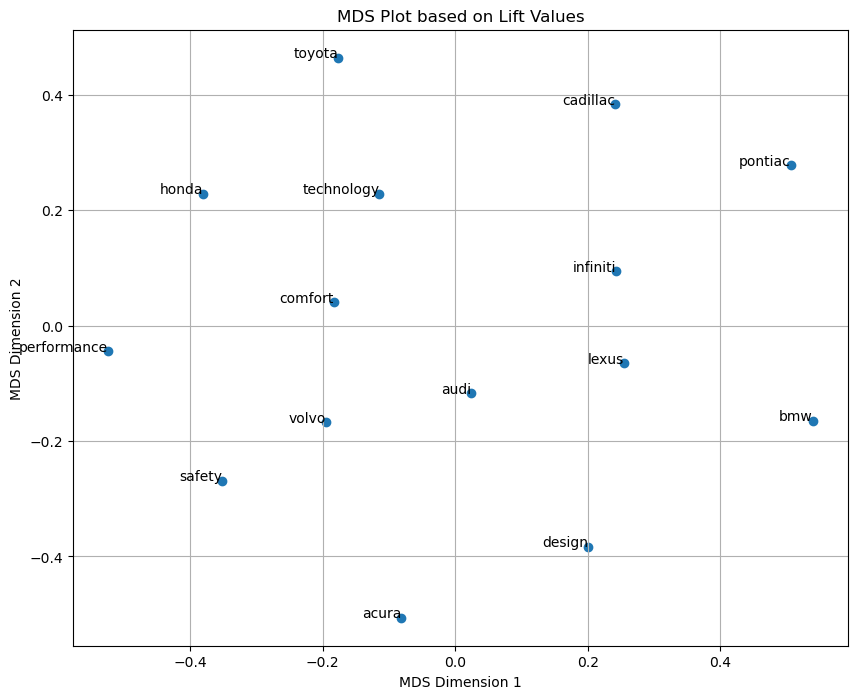

In [3]:
full_matrix = pd.read_csv('Lift_Matrix_final.csv', index_col=0)
dissimilarity_matrix = 1 / full_matrix.replace(0, 1e-9).astype(float)

# Apply MDS to reduce dimensionality to 2D
# Note that this could take some time depending on the size of the matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(dissimilarity_matrix)

# Plot the MDS result
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1])

# Annotate points with feature names (the names of the brands in this case)
feature_names = dissimilarity_matrix.index
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (mds_result[i, 0], mds_result[i, 1]), ha='right')

plt.title('MDS Plot based on Lift Values')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

df = pd.read_csv("/Users/lauray/Documents/学习/MMA/courses/Winter 2024/INSY 669 - Text/group project/edmunds_extraction.csv",  header=None, names=["id", "date", "comment"])
models = pd.read_csv("/Users/lauray/Documents/学习/MMA/courses/Winter 2024/INSY 669 - Text/group project/models.csv", header=None, names=["brand", "model"])

# Preprocess models
models = models.replace({"\.": "", ",": ""}, regex=True)

In [ ]:
df["comment"] = df["comment"].apply(lambda x: x.lower())

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def get_pos(word):
    return nltk.pos_tag([word])[0][1][0].lower()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w, pos=get_pos(text)) for w in word_tokenize(text)]

df["lemmatized"] = df["comment"].apply(lemmatize_text)

In [ ]:
df_filtered = df[df["lemmatized"].apply(lambda x: "buy" in x or "own" in x)]

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiments(text):
    vs = analyzer.polarity_scores(text)
    return vs['neg'], vs['neu'], vs['pos'], vs['compound']

df_filtered[['neg', 'neu', 'pos', 'compound']] = df_filtered['comment'].apply(lambda x: pd.Series(get_sentiments(x)))

model_scores = {}
avg_model_scores = {}

def calculate_scores(row, model):
    if model in row['comment']:
        return pd.Series([row['neg'], row['neu'], row['pos'], row['compound']])
    else:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])

for brand in models["brand"]:
    scores_df = df_filtered.apply(calculate_scores, axis=1, args=(brand,))
    valid_scores_df = scores_df.dropna()
    avg_scores = valid_scores_df.mean(axis=0) if not valid_scores_df.empty else [0, 0, 0, 0]
    valid_scores = valid_scores_df.sum(axis=0) if not valid_scores_df.empty else [0, 0, 0, 0]
    avg_model_scores[brand] = {'neg': avg_scores[0], 'neu': avg_scores[1], 'pos': avg_scores[2], 'compound': avg_scores[3]}
    model_scores[brand] = {'neg': valid_scores[0], 'neu': valid_scores[1], 'pos': valid_scores[2], 'compound': valid_scores[3]}

/var/folders/m3/rkf8sc1n3szc_zvwzgfp80540000gn/T/ipykernel_19554/2864220617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['neg', 'neu', 'pos', 'compound']] = df_filtered['comment'].apply(lambda x: pd.Series(get_sentiments(x)))


In [ ]:
model_scores = pd.DataFrame(model_scores).T
model_scores.sort_values(by = "compound", ascending=False)

,neg,neu,pos,compound
car,34.485,698.279,83.228,483.4594
bmw,19.526,405.714,48.754,305.3589
sedan,7.372,155.550,19.071,126.6945
audi,7.598,147.126,18.278,125.0982
acura,6.351,132.064,15.584,101.5877
seat,6.195,115.061,15.743,97.3233
infiniti,6.090,122.268,14.640,93.1478
ford,4.528,89.802,10.663,70.2528
volvo,3.088,61.185,7.721,52.4532
honda,3.613,63.152,8.235,50.4986


In [ ]:
top10brand = ['acura', 'bmw', 'toyota', 'audi', 'cadillac', 'lexus', 'honda', 'pontiac', 'infiniti', 'volvo']
top10_scores  = model_scores[model_scores.index.isin(top10brand)]

In [ ]:
top10_scores.sort_values(by="compound", ascending=False)

,neg,neu,pos,compound
bmw,19.526,405.714,48.754,305.3589
audi,7.598,147.126,18.278,125.0982
acura,6.351,132.064,15.584,101.5877
infiniti,6.090,122.268,14.640,93.1478
volvo,3.088,61.185,7.721,52.4532
honda,3.613,63.152,8.235,50.4986
cadillac,3.232,56.969,7.796,47.9975
toyota,2.437,43.115,5.448,35.4549
pontiac,0.679,11.045,1.274,8.2145


In [ ]:
df_bmw = df_filtered[df_filtered["comment"].apply(lambda x: "bmw" in x)]
df_bmw

,id,date,comment,lemmatized,neg,neu,pos,compound
12,quasiactuary,06-Mar,"""focusing in only on turning radius as a way ...","[``, focusing, in, only, on, turning, radius, ...",0.066,0.895,0.039,-0.8333
13,blueguydotcom,06-Mar,i heard that the 335i will be sold solely as ...,"[i, heard, that, the, 335i, will, be, sold, so...",0.083,0.868,0.049,-0.6284
45,vchiu,06-Apr,"yes, we are on the same line. germany is my p...","[yes, ,, we, are, on, the, same, line, ., germ...",0.071,0.831,0.098,0.3597
53,primetime79,06-May,let me preface my post by unequivocally stati...,"[let, me, preface, my, post, by, unequivocally...",0.044,0.846,0.111,0.9971
54,pgsmith,06-May,my experience @ bmw was similar. obviously i ...,"[my, experience, @, bmw, wa, similar, ., obvio...",0.084,0.814,0.103,0.9119
...,...,...,...,...,...,...,...,...
7259,tlong,11-Dec,i also found this interesting post courtesy g...,"[i, also, found, this, interesting, post, cour...",0.086,0.797,0.116,0.8436
7281,nyccarguy,12-Jan,i love the pix & the video of your e30 m3! i ...,"[i, love, the, pix, &, the, video, of, your, e...",0.000,0.937,0.063,0.8718
7298,markcincinnati,12-Jan,maybe it is just the congestion caused by all...,"[maybe, it, is, just, the, congestion, caused,...",0.023,0.884,0.093,0.9921
7304,nyccarguy,12-Jan,excellent posts guys.how fast can we really g...,"[excellent, post, guys.how, fast, can, we, rea...",0.019,0.903,0.077,0.9722


In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    filtered_sentence = []
    for w in text:
        if (w not in stop_words) and (w.isalpha()):
            filtered_sentence.append(w)
    return filtered_sentence
df_bmw["stopwords_removed"] = df_bmw["lemmatized"].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/m3/rkf8sc1n3szc_zvwzgfp80540000gn/T/ipykernel_19554/4171586005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["stopwords_removed"] = df_bmw["lemmatized"].apply(lambda x: remove_stopwords(x))


In [ ]:
word_freq_bmw = {}

for word_list in df_bmw["stopwords_removed"]:
    for w in word_list:
        word_freq_bmw[w] = word_freq_bmw.get(w, 0) + 1

word_pair_freq_bmw = {'buy': {}, 'own': {}}

for word_list in df_bmw["stopwords_removed"]:
    for i in word_freq_bmw.keys():
        for j in ["buy", "own"]:
            if i in word_list and j in word_list:
                if i not in word_pair_freq_bmw[j]:
                    word_pair_freq_bmw[j][i] = 0
                word_pair_freq_bmw[j][i] += 1

print(word_pair_freq_bmw)


{'buy': {'focusing': 1, 'turning': 5, 'radius': 2, 'way': 69, 'comparing': 13, 'car': 262, 'inherantly': 1, 'unfair': 1, 'tl': 47, 'may': 45, 'much': 102, 'larger': 9, 'also': 83, 'series': 70, 'bmw': 286, 'add': 15, 'wheel': 32, 'wide': 2, 'tread': 2, 'result': 12, 'given': 20, 'size': 16, 'difference': 37, 'see': 64, 'fringe': 1, 'one': 143, 'another': 56, 'class': 37, 'comparison': 14, 'perspective': 4, 'bought': 41, 'maxxed': 1, 'maximum': 8, 'sl': 2, 'compare': 12, 'directly': 4, 'almost': 29, 'performance': 67, 'wa': 141, 'objective': 5, 'measure': 6, 'maneuverability': 1, 'certainly': 18, 'would': 159, 'buy': 314, 'strictly': 3, 'based': 26, 'go': 63, 'equation': 2, 'cubic': 1, 'foot': 11, 'passenger': 11, 'volume': 3, 'doe': 96, 'btw': 15, 'trunk': 15, 'compared': 22, 'could': 69, 'argue': 8, 'overall': 12, 'plus': 26, 'smaller': 8, 'disadvantage': 2, 'term': 24, 'front': 21, 'drive': 97, 'design': 19, 'trying': 20, 'reopen': 1, 'think': 109, 'great': 48, 'find': 44, 'parking':

In [ ]:
N = df_bmw.shape[0]
word_lift_bmw = {'buy': {}, 'own': {}}

for i in word_freq_bmw.keys():
    for j in ["buy", "own"]:
        if j in word_pair_freq_bmw and i in word_pair_freq_bmw[j]:
            # Calculate probabilities and lift
            prob_i = word_freq_bmw[i] / N
            prob_j = word_freq_bmw[j] / N
            prob_ij = word_pair_freq_bmw[j].get(i, 0) / N

            # Avoid division by zero
            if prob_i * prob_j > 0:
                word_lift_bmw[j][i] = prob_ij / (prob_i * prob_j)
            else:
                word_lift_bmw[j][i] = 0

print(word_lift_bmw)



{'buy': {'focusing': 0.5924999999999999, 'turning': 0.34852941176470587, 'radius': 0.237, 'way': 0.5600342465753424, 'comparing': 1.027, 'car': 0.2334360902255639, 'inherantly': 1.1849999999999998, 'unfair': 1.1849999999999998, 'tl': 0.3525, 'may': 0.5733870967741936, 'much': 0.6073869346733669, 'larger': 0.5613157894736842, 'also': 0.5854464285714286, 'series': 0.4388888888888889, 'bmw': 0.3963859649122807, 'add': 0.5733870967741935, 'wheel': 0.7022222222222221, 'wide': 0.5924999999999999, 'tread': 0.7899999999999999, 'result': 0.88875, 'given': 0.764516129032258, 'size': 0.5266666666666666, 'difference': 0.5694155844155845, 'see': 0.7222857142857142, 'fringe': 1.1849999999999998, 'one': 0.46173024523160755, 'another': 0.7716279069767441, 'class': 0.5846, 'comparison': 0.5184375, 'perspective': 0.39499999999999996, 'bought': 0.6228846153846154, 'maxxed': 1.1849999999999998, 'maximum': 0.677142857142857, 'sl': 1.1849999999999998, 'compare': 0.711, 'directly': 0.948, 'almost': 0.6738235

In [ ]:
sorted_word_lift_bmw = {}

for key in word_lift_bmw:
    # Sort the sub-dictionary by lift value in descending order
    sorted_word_lift_bmw[key] = dict(sorted(word_lift_bmw[key].items(), key=lambda item: item[1], reverse=True))

print(sorted_word_lift_bmw)


{'buy': {'present': 1.185, 'allows': 1.185, 'killing': 1.185, 'nobody': 1.185, 'finding': 1.185, 'nicely': 1.185, 'potential': 1.185, 'fleet': 1.185, 'successful': 1.185, 'financially': 1.185, 'enjoyable': 1.185, 'worst': 1.185, 'assuming': 1.185, 'planet': 1.185, 'detail': 1.185, 'roof': 1.185, 'bloated': 1.185, 'heartbeat': 1.185, 'moment': 1.185, 'dedicated': 1.185, 'rain': 1.185, 'wouldnt': 1.185, 'stopped': 1.185, 'inherantly': 1.1849999999999998, 'unfair': 1.1849999999999998, 'fringe': 1.1849999999999998, 'maxxed': 1.1849999999999998, 'sl': 1.1849999999999998, 'strictly': 1.1849999999999998, 'equation': 1.1849999999999998, 'reopen': 1.1849999999999998, 'fairly': 1.1849999999999998, 'mades': 1.1849999999999998, 'solely': 1.1849999999999998, 'ignorant': 1.1849999999999998, 'connection': 1.1849999999999998, 'stiffer': 1.1849999999999998, 'framed': 1.1849999999999998, 'glass': 1.1849999999999998, 'flexible': 1.1849999999999998, 'china': 1.1849999999999998, 'preface': 1.18499999999999